# Programming Project: Cardiovascular Disease Rates in the U.S. from 2000 to 2019

### Kenneth Wanjiru

In [1]:
#Data Analysis Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

print ("\n" + '{:<5} : {:2}'.format("Finished", str(datetime.datetime.now())))


Finished : 2024-04-25 20:00:38.339659


## Introduction

* This project will answer the following question: How have rates of cardiovascular disease in the United States changed over the past 20 years?

* The dataset we will be using comes from data.gov. 
* It includes data from the U.S. Department of Health on rates of heart disease and stroke mortality by county from 1999 to 2019. 
* It also offers information about cardiovascular disease rates among different demographic groups (ex. gender, race/ethnicity, age).

In [2]:
%%time
df = pd.read_csv("HeartDiseaseData.csv", low_memory = False)

CPU times: total: 44.5 s
Wall time: 1min 38s


In [3]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


## Data Cleaning

* First, we identified the columns in the dataset that had only one constant value. These columns would not offer valuable information for our investigation, so we will remove them.

In [4]:
df.nunique()

Year                             23
LocationAbbr                     51
LocationDesc                   1829
GeographicLevel                   1
DataSource                        1
Class                             1
Topic                             5
Data_Value                    34396
Data_Value_Unit                   2
Data_Value_Type                   2
Data_Value_Footnote_Symbol        1
Data_Value_Footnote               1
Confidence_limit_Low          31454
Confidence_limit_High         37978
StratificationCategory1           1
Stratification1                   2
StratificationCategory2           1
Stratification2                   6
StratificationCategory3           1
Stratification3                   3
LocationID                     3136
dtype: int64

* The majority of disease rates in the dataset were recorded as the number of cases per 100,000 people. 
* However, a few were recorded as percent changes from the previous year. We removed the observations measured as percent changes for easier interpretation and to ensure we only included positive numbers in our disease rate column.

In [5]:
df.Data_Value_Unit.unique()

array(['per 100,000', '%'], dtype=object)

In [6]:
df = df[df["Data_Value_Unit"] != "%"]

* We then removed the columns that would not provide useful information for our investigation.

In [7]:
df = df.drop(columns = ["GeographicLevel", "DataSource", "Class", "Data_Value_Unit", "Data_Value_Type",
                        "Data_Value_Footnote_Symbol", "Data_Value_Footnote", "StratificationCategory1",
                        "StratificationCategory2", "StratificationCategory3", "LocationID"])

* Next, we renamed certain columns and made sure they were all the correct data type.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268480 entries, 0 to 5268498
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   object 
 1   LocationAbbr           object 
 2   LocationDesc           object 
 3   Topic                  object 
 4   Data_Value             float64
 5   Confidence_limit_Low   float64
 6   Confidence_limit_High  float64
 7   Stratification1        object 
 8   Stratification2        object 
 9   Stratification3        object 
dtypes: float64(3), object(7)
memory usage: 442.1+ MB


In [9]:
df = df.rename(columns = {"Stratification1" : "Age_Group",
                         "Stratification2" : "Race_Ethnicity",
                         "Stratification3" : "Gender",
                         "LocationDesc" : "County",
                         "Data_Value" : "Disease_Rate",
                         "LocationAbbr" : "State"})

In [10]:
df["Year"] = pd.to_numeric(df["Year"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5268480 entries, 0 to 5268498
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   State                  object 
 2   County                 object 
 3   Topic                  object 
 4   Disease_Rate           float64
 5   Confidence_limit_Low   float64
 6   Confidence_limit_High  float64
 7   Age_Group              object 
 8   Race_Ethnicity         object 
 9   Gender                 object 
dtypes: float64(3), int64(1), object(6)
memory usage: 442.1+ MB


In [12]:
df.head()

,Year,State,County,Topic,Disease_Rate,Confidence_limit_Low,Confidence_limit_High,Age_Group,Race_Ethnicity,Gender
0,1999,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


## Descriptive Statistics

* The minimum disease rate recorded in 1999 was about 1 person per 100,000 people in a county, and the minimum in 2019 was less than 1 person per 100,000 people.

* The average disease rate recorded in 1999 was about 654 people per 100,000 people, and the average in 2019 was 406 people per 100,000 people.

* The maximum disease rate recorded in 1999 was 4,152 people per 100,000 people, and the maximum in 2019 was 3,381 people per 100,000 people.

In [13]:
df_1999 = df[df["Year"] == 1999]
df_1999.describe()

,Year,Disease_Rate,Confidence_limit_Low,Confidence_limit_High
count,250880.0,147995.000000,147995.000000,147995.000000
mean,1999.0,654.378824,563.267758,761.907737
std,0.0,831.555897,738.657447,938.892801
min,1999.0,1.200000,0.800000,2.800000
25%,1999.0,57.100000,43.300000,75.000000
50%,1999.0,218.800000,179.400000,269.700000
75%,1999.0,1020.850000,842.500000,1229.300000
max,1999.0,4152.500000,3729.000000,5035.200000


In [14]:
df_2019 = df[df["Year"] == 2019]
df_2019.describe()

,Year,Disease_Rate,Confidence_limit_Low,Confidence_limit_High
count,250880.0,148050.000000,148050.000000,148050.000000
mean,2019.0,406.414249,353.058225,469.158639
std,0.0,505.566422,454.761286,563.624504
min,2019.0,0.700000,0.100000,1.500000
25%,2019.0,42.000000,31.825000,55.400000
50%,2019.0,182.600000,150.100000,222.000000
75%,2019.0,560.300000,470.100000,666.600000
max,2019.0,3381.400000,3029.100000,3928.400000


## Line Plot of Disease Rates Over Time

* We grouped the data into one observation for each year that represents the average disease rate across all counties for that year.

* The line plot shows a steep decrease in the average cardiovascular disease rate in the U.S. from 1999 to about 2011, dropping from above 650 people per 100,000 in 1999 to about 425 per 100,000 around 2011. 
* Disease rates continued to decrease from 2011 to 2019 at a slightly slower rate, ending just above 400 people per 100,000 in 2019.

The fact that disease rates are declining at a slower rate than they were before 2011 is interesting. This could be due to a variety of causes:
1. There may have been more scientific advances than usual for treating cardiovascular disease in the early 2000s, so this progress could be slowing down in comparison.
2. One risk factor of cardiovascular disease is smoking. While smoking decreased in popularity in the early 2000s, substitutes like vaping, which can still pose a risk, became more popular in the 2010s. This may explain why disease rates are not decreasing as rapidly now.

Based on the graph, we can generally predict that the average national cardiovascular disease rate will continue decreasing over the next few years, but it will eventually stabilize around 400 people per 100,000.

In [15]:
collist = ["Year", "Disease_Rate", "Confidence_limit_Low", "Confidence_limit_High"]
df_year = df.groupby("Year", as_index = False, sort = True)[collist].mean()
df_year.head()

,Year,Disease_Rate,Confidence_limit_Low,Confidence_limit_High
0,1999.0,654.378824,563.267758,761.907737
1,2000.0,637.858300,556.334273,732.994773
2,2001.0,617.989555,541.885747,706.329304
3,2002.0,608.264816,534.245364,694.097351
4,2003.0,589.616238,516.639549,674.314532


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Disease Rate (per 100,000 People)'),
 Text(0.5, 1.0, 'Figure 1: Average U.S. Cardiovascular Disease Rate over Time'),

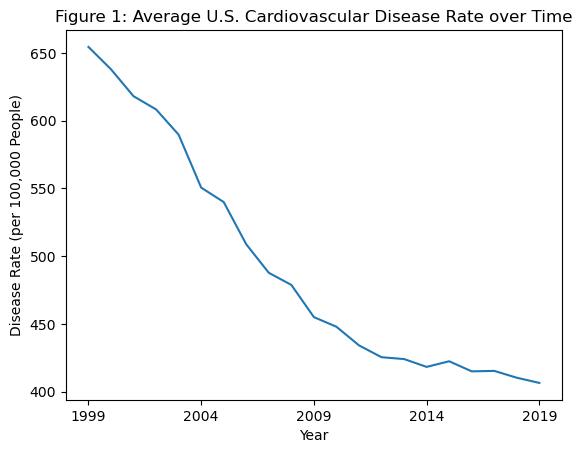

In [16]:
sns.lineplot(data = df_year,
             x = "Year",
             y = "Disease_Rate").set(xlabel = "Year",
                                     ylabel = "Disease Rate (per 100,000 People)",
                                     title = "Figure 1: Average U.S. Cardiovascular Disease Rate over Time",
                                     xticks = [1999, 2004, 2009, 2014, 2019])

## Disease Rates by Category

* To investigate whether different diseases have become more prominent over time, we created two bar graphs. One is for the first year in the dataset (1999), and the other is for the last year (2019).

Based on these two graphs, the relative frequency of the different categories are the same in 1999 and in 2019. In both years, cardiovascular disease was the most common issue, and heart failure and strokes were the least common.

In [17]:
collist2 = ["Year", "Topic", "Disease_Rate", "Confidence_limit_Low", "Confidence_limit_High"]
df_topic99 = df[df["Year"] == 1999]
df_topic99 = df_topic99.groupby("Topic", as_index = False, sort = True)[collist].mean()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'All heart disease'),
  Text(1, 0, 'All stroke'),
  Text(2, 0, 'Cardiovascular disease (CVD)'),
  Text(3, 0, 'Coronary heart disease (CHD)'),
  Text(4, 0, 'Heart failure')])

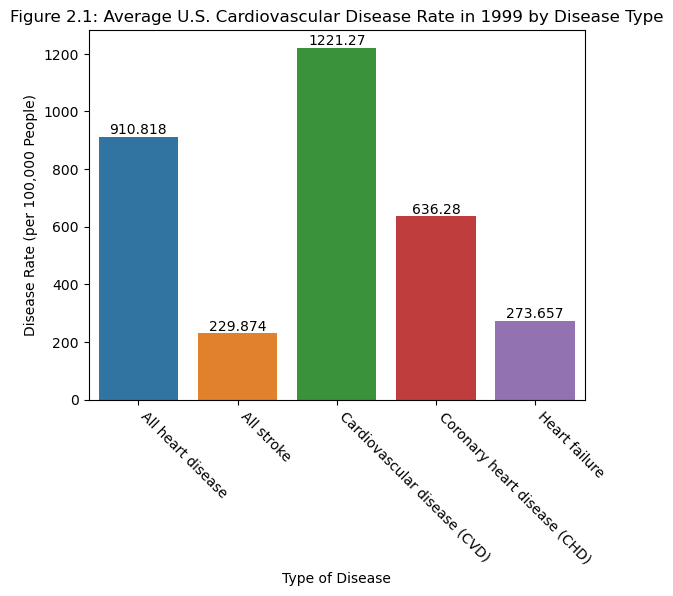

In [18]:
ax = sns.barplot(x = "Topic",
            y = "Disease_Rate",
            data = df_topic99)
ax.bar_label(ax.containers[0], label_type="edge")
ax.set(xlabel = "Type of Disease",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 2.1: Average U.S. Cardiovascular Disease Rate in 1999 by Disease Type")
plt.xticks(rotation=-45, ha = "left")

In [19]:
df_topic19 = df[df["Year"] == 2019]
df_topic19 = df_topic19.groupby("Topic", as_index = False, sort = True)[collist].mean()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'All heart disease'),
  Text(1, 0, 'All stroke'),
  Text(2, 0, 'Cardiovascular disease (CVD)'),
  Text(3, 0, 'Coronary heart disease (CHD)'),
  Text(4, 0, 'Heart failure')])

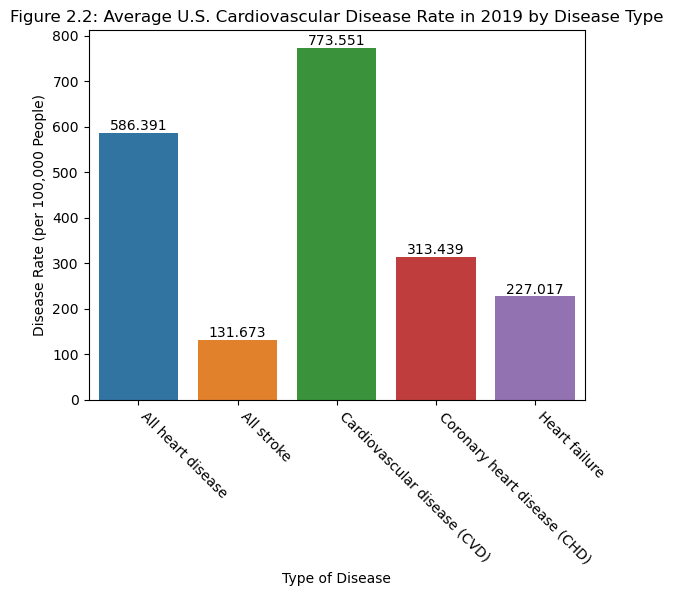

In [20]:
ax = sns.barplot(x = "Topic",
            y = "Disease_Rate",
            data = df_topic19)
ax.bar_label(ax.containers[0], label_type="edge")
ax.set(xlabel = "Type of Disease",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 2.2: Average U.S. Cardiovascular Disease Rate in 2019 by Disease Type")
plt.xticks(rotation=-45, ha = "left")

## Disease Rates by State

* We created bar graphs with the states with the 5 highest and 5 lowest average rates of cardiovascular disease in 1999 and 2019.

* In 1999, West Virginia had the highest rate of cardiovascular disease. In 2019, however, West Virginia was no longer in the top 5, and Mississippi had the highest rate instead. Three of the states with the highest rates of cardiovascular disease in 1999 were still among the top 5 states in 2019 (Mississippi, Tennessee, and Arkansas).

* In both 1999 and 2019, Alaska had the lowest rate of cardiovascular disease. Colorado, Massachusetts, and Rhode Island were also among the 5 states with the lowest rates in both years.

In [21]:
collist3 = ["Year", "State", "Disease_Rate", "Confidence_limit_Low", "Confidence_limit_High"]
df_state99 = df[df["Year"] == 1999]
df_state99 = df_state99.groupby("State", as_index = False, sort = True)[collist].mean()

[Text(0, 0, '816.552'),
 Text(0, 0, '814.608'),
 Text(0, 0, '786.017'),
 Text(0, 0, '755.056'),
 Text(0, 0, '736.025')]

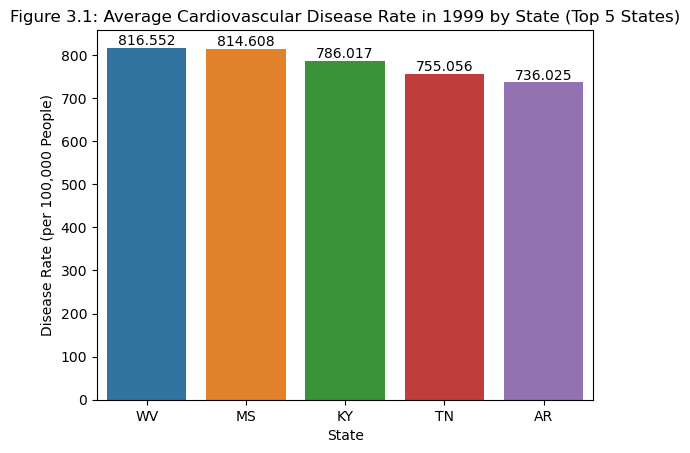

In [22]:
ax = sns.barplot(x = "State",
                 y = "Disease_Rate",
                 data = df_state99.nlargest(5, "Disease_Rate"))
ax.set(xlabel = "State",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 3.1: Average Cardiovascular Disease Rate in 1999 by State (Top 5 States)")
ax.bar_label(ax.containers[0], label_type="edge")

In [23]:
df_state19 = df[df["Year"] == 2019]
df_state19 = df_state19.groupby("State", as_index = False, sort = True)[collist].mean()

[Text(0, 0, '526.883'),
 Text(0, 0, '504.449'),
 Text(0, 0, '485.133'),
 Text(0, 0, '483.936'),
 Text(0, 0, '482.811')]

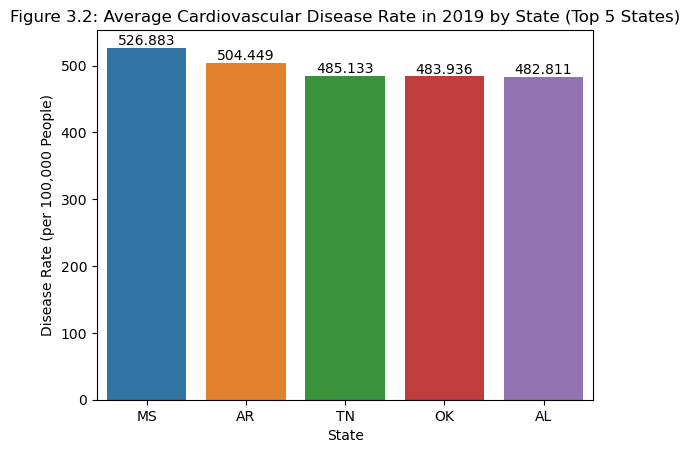

In [24]:
ax = sns.barplot(x = "State",
                 y = "Disease_Rate",
                 data = df_state19.nlargest(5, "Disease_Rate"))
ax.set(xlabel = "State",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 3.2: Average Cardiovascular Disease Rate in 2019 by State (Top 5 States)")
ax.bar_label(ax.containers[0], label_type="edge")

[Text(0, 0, '415.387'),
 Text(0, 0, '485.85'),
 Text(0, 0, '496.859'),
 Text(0, 0, '511.004'),
 Text(0, 0, '512.299')]

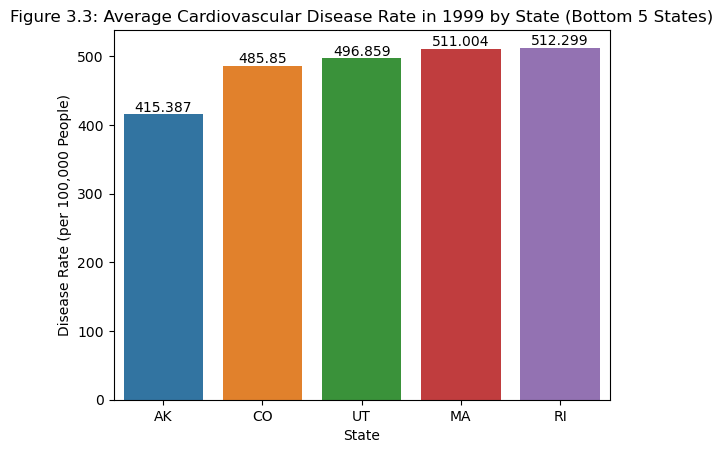

In [25]:
ax = sns.barplot(x = "State",
                 y = "Disease_Rate",
                 data = df_state99.nsmallest(5, "Disease_Rate"))
ax.set(xlabel = "State",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 3.3: Average Cardiovascular Disease Rate in 1999 by State (Bottom 5 States)")
ax.bar_label(ax.containers[0], label_type="edge")

[Text(0, 0, '259.642'),
 Text(0, 0, '279.885'),
 Text(0, 0, '298.496'),
 Text(0, 0, '300.262'),
 Text(0, 0, '302.131')]

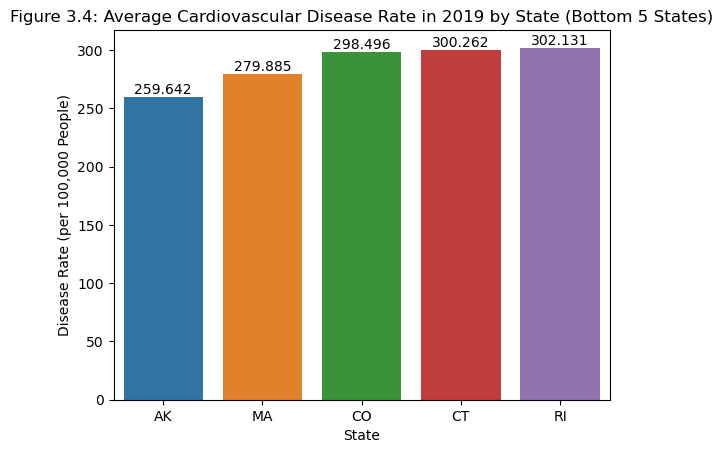

In [26]:
ax = sns.barplot(x = "State",
                 y = "Disease_Rate",
                 data = df_state19.nsmallest(5, "Disease_Rate"))
ax.set(xlabel = "State",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 3.4: Average Cardiovascular Disease Rate in 2019 by State (Bottom 5 States)")
ax.bar_label(ax.containers[0], label_type="edge")

## Disease Rates by Age Group

* Two age groups: people between the ages of 35 and 64, and people 65 and older. 
* In both 1999 and 2019, the vast majority of cardiovascular disease cases were among older people.

In [27]:
collist4 = ["Year", "Age_Group", "Disease_Rate", "Confidence_limit_Low", "Confidence_limit_High"]
df_age99 = df[df["Year"] == 1999]
df_age99 = df_age99.groupby("Age_Group", as_index = False, sort = True)[collist].mean()

[Text(0, 0, '87.6228'), Text(0, 0, '1313.99')]

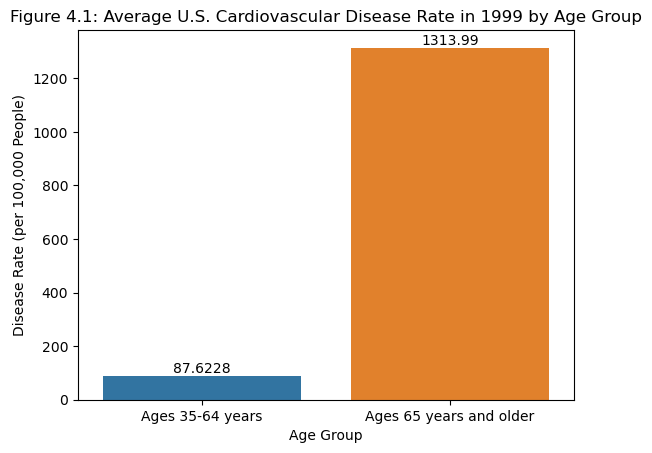

In [28]:
ax = sns.barplot(x = "Age_Group",
                 y = "Disease_Rate",
                 data = df_age99)
ax.set(xlabel = "Age Group",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 4.1: Average U.S. Cardiovascular Disease Rate in 1999 by Age Group")
ax.bar_label(ax.containers[0], label_type="edge")

In [29]:
df_age19 = df[df["Year"] == 2019]
df_age19 = df_age19.groupby("Age_Group", as_index = False, sort = True)[collist].mean()

[Text(0, 0, '72.5006'), Text(0, 0, '795.037')]

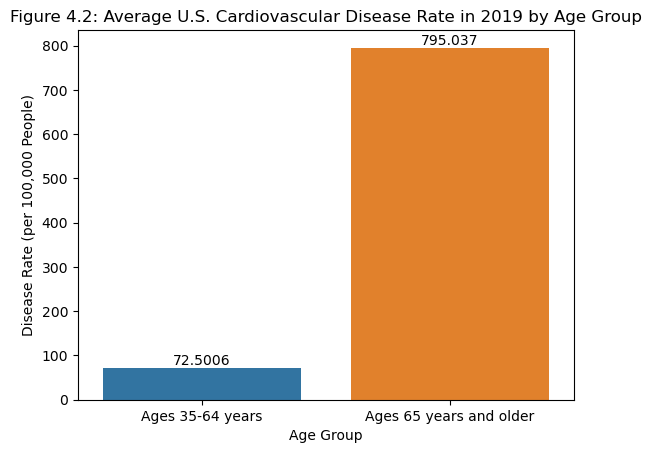

In [30]:
ax = sns.barplot(x = "Age_Group",
                 y = "Disease_Rate",
                 data = df_age19)
ax.set(xlabel = "Age Group",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 4.2: Average U.S. Cardiovascular Disease Rate in 2019 by Age Group")
ax.bar_label(ax.containers[0], label_type="edge")

## Disease Rates by Gender

* We also compared cardiovascular disease rates between men and women in 1999 and 2019.

* In both years, rates were higher among men than women.

In [31]:
collist5 = ["Year", "Gender", "Disease_Rate", "Confidence_limit_Low", "Confidence_limit_High"]
df_gender99 = df[df["Year"] == 1999]
df_gender99 = df_gender99[df_gender99["Gender"] != "Overall"]
df_gender99 = df_gender99.groupby("Gender", as_index = False, sort = True)[collist].mean()

[Text(0, 0, '829.356'), Text(0, 0, '598.889')]

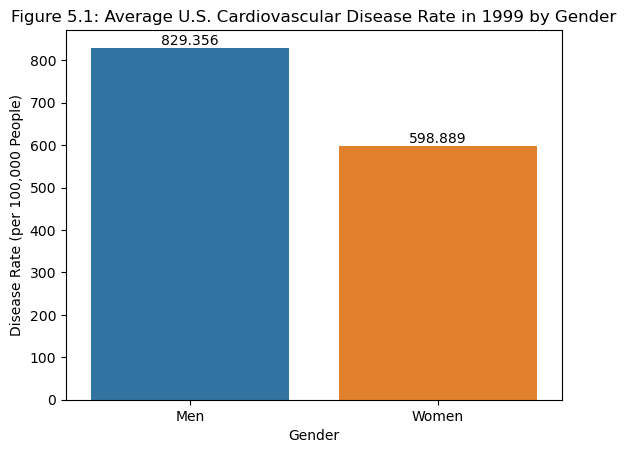

In [32]:
ax = sns.barplot(x = "Gender",
                 y = "Disease_Rate",
                 data = df_gender99)
ax.set(xlabel = "Gender",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 5.1: Average U.S. Cardiovascular Disease Rate in 1999 by Gender")
ax.bar_label(ax.containers[0], label_type="edge")

In [33]:
df_gender19 = df[df["Year"] == 2019]
df_gender19 = df_gender19[df_gender19["Gender"] != "Overall"]
df_gender19 = df_gender19.groupby("Gender", as_index = False, sort = True)[collist].mean()

[Text(0, 0, '523.256'), Text(0, 0, '358.927')]

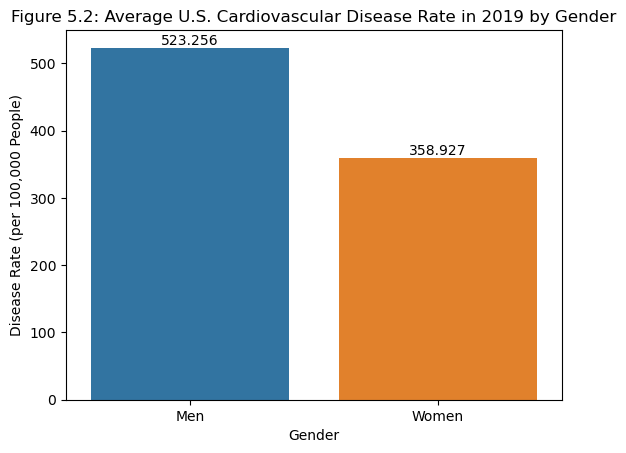

In [34]:
ax = sns.barplot(x = "Gender",
                 y = "Disease_Rate",
                 data = df_gender19)
ax.set(xlabel = "Gender",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 5.2: Average U.S. Cardiovascular Disease Rate in 2019 by Gender")
ax.bar_label(ax.containers[0], label_type="edge")

## Disease Rates by Race/Ethnicity

* Lastly, we looked at cardiovascular disease rates by race/ethnicity in 1999 and 2019.

* In both years, trends by race/ethnicity were relatively the same. The groups with the highest rates were White people and non-hispanic Black people, and the group with the lowest rate was Asian/Pacific Islanders.

In [35]:
collist6 = ["Year", "Race_Ethnicity", "Disease_Rate", "Confidence_limit_Low", "Confidence_limit_High"]
df_race99 = df[df["Year"] == 1999]
df_race99 = df_race99[df_race99["Race_Ethnicity"] != "Overall"]
df_race99 = df_race99.groupby("Race_Ethnicity", as_index = False, sort = True)[collist].mean()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'American Indian/Alaska Native'),
  Text(1, 0, 'Asian/Pacific Islander'),
  Text(2, 0, 'Black (Non-Hispanic)'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'White')])

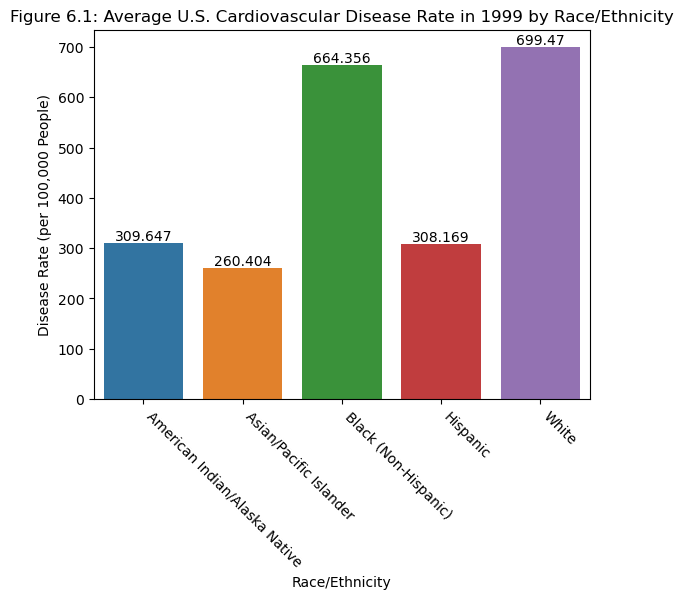

In [36]:
ax = sns.barplot(x = "Race_Ethnicity",
            y = "Disease_Rate",
            data = df_race99)
ax.set(xlabel = "Race/Ethnicity",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 6.1: Average U.S. Cardiovascular Disease Rate in 1999 by Race/Ethnicity")
ax.bar_label(ax.containers[0], label_type="edge")
plt.xticks(rotation=-45, ha = "left")

In [37]:
df_race19 = df[df["Year"] == 2019]
df_race19 = df_race19[df_race19["Race_Ethnicity"] != "Overall"]
df_race19 = df_race19.groupby("Race_Ethnicity", as_index = False, sort = True)[collist].mean()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'American Indian/Alaska Native'),
  Text(1, 0, 'Asian/Pacific Islander'),
  Text(2, 0, 'Black (Non-Hispanic)'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'White')])

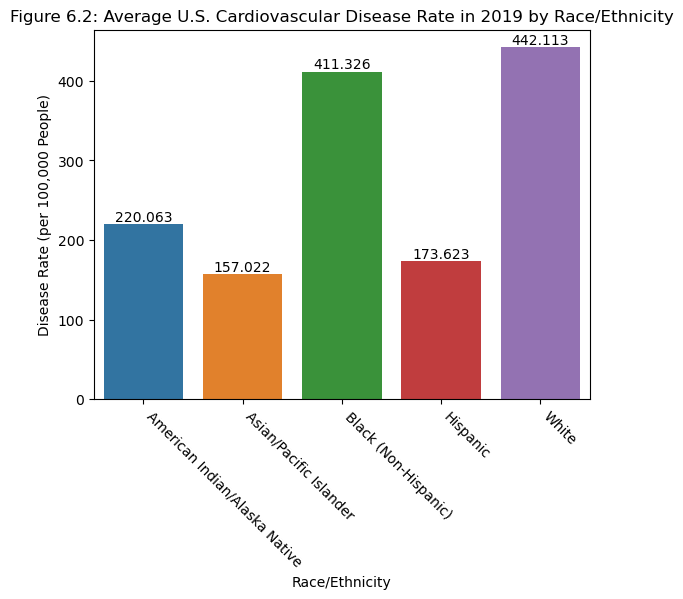

In [38]:
ax = sns.barplot(x = "Race_Ethnicity",
            y = "Disease_Rate",
            data = df_race19)
ax.set(xlabel = "Race/Ethnicity",
       ylabel = "Disease Rate (per 100,000 People)",
       title = "Figure 6.2: Average U.S. Cardiovascular Disease Rate in 2019 by Race/Ethnicity")
ax.bar_label(ax.containers[0], label_type="edge")
plt.xticks(rotation=-45, ha = "left")

## Conclusion

* Overall, rates of cardiovascular disease have decreased from 1999 to 2019. 
* However, many trends have largely stayed the same, like differences by state, age, gender, and race/ethnicity. These trends are ongoing, just at a smaller scale.

## Sources

Dataset:  
https://catalog.data.gov/dataset/rates-and-trends-in-heart-disease-and-stroke-mortality-among-us-adults-35-by-county-a-2000-45659